# # Business Understanding

Financial Institutions like banks accept deposits of various  forms from the public and organisations.   They offer interest of different scales on these deposits.The key of the banking business lies in investing and lending the borrowed money of the public to the intending borrowers and investors in profitable manner . Obviously the interest rates and spread of the lending schemes  would be greater than that of the deposit schemes.Here marketing plays a vital role so that targeted groups are properly identified , touched and responded.  For example, Kotak Mahindra Bank offers the following:


Credits: Kotak Mahindra Bank Website ([Link](https://www.kotak.com/en/corporate/solutions/manage-my-transactions/account-maintenance/term-deposit.html))

**Note: The interests earned on the term deposits are component of the taxable income.**

- A bank usually invests the customer’s long-term deposits into riskier financial assets which can earn the better return than what they pay to their customer. 

- The customer is assured a risk-free return on his/her deposit. However, the return on the fixed-term deposit is better than the savings account as the customer is deprived off the rights to use the fund prior to the maturity unless one is ready to compensate the bank as per the pre-specified agreements on the particular term deposit scheme.

- Marketing campaigns to obtain a narrow retail segment interested in investing in term deposits is one of the core challenges faced by the banking industry today. With the years of overflowing liquidity and manual regulation over the banking investements becoming a thing of past, there is a process of scrutiny over the services offered by banks especially in the private sector today. 

- The industry has faced severe rise in the interest rates and regulation of the customers earnings, thus making the retail segment of banking a very competitive field.

A few of the demands by the various roles within the industry are as follows:

1. Product managers are looking for more accurate tools to manage deposit pricing as customers seek higher returns and the bank’s funding needs change;

2. Chief financial officers are demanding improved forecasting tools so they can better anticipate fluctuations in balances and funding costs as rates rise;

3. Treasurers and chief risk officers are under pressure to field a new generation of sophisticated stress testing tools to satisfy expanding regulatory expectations

4. Marketing managers need improved targeting algorithms and success metrics to match the right levels of spend with the right customers and prospects.

With advancement in data science and machine learning and availability of data, most banks are adapting to a data-driven decision. The dataset here consists of direct marketing by contacting the clients and assessing the success rate of sales made.

The result is a growing misalignment in deposit management. Within most banks, different teams use different tools that rely on different models with different metrics derived from different data.

Typically each deposit-related management group uses its own custom blend of internal and external data, accompanied by special labels, definitions and groupings that are difficult to rectify with other silos. Algorithms that seek to categorize customer behavior by households often diverge, especially when it comes to analyzing historical trend data. Meanwhile each silo uses its own database structure.

In this project, we apply machine learning algorithms to build a predictive model of the data set to provide a necessary suggestion for marketing campaign team. The goal is to predict whether a client will subscribe a term deposit (variable y) with the help of a given set of dependent variables. This is a real dataset collected from a Portuguese bank that used its own contact-center to do direct marketing campaigns to motivate and attract the clients for their term deposit scheme to enhance the business.

Key Aspects to understand:
Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

# Data Understanding

The following features are present within the dataset:

1. id	Unique identifier for each sample in the dataset. Cannot be used for modelling
2. customer_age	Age of the Customer in years
3. job_type	Type of job of the customer
4. marital	Marital Status of the Custmer
5. education	Education Level of the Customer
6. default	Whether customer has Defaulted in Past
7. balance	Current Balance in the Customer's Bank
8. housing_loan	Has customer taken a Housing Loan
9. personal_loan	Has customer taken a Personal Loan
10. communication_type	Type of communication made by the bank with the customer
11. day_of_month	Day of month of the last contact made with customer
12. month	Month for the last contact made with customer
13. last_contact_duration	Last Contact duration made with the customer (in seconds)
14. num_contacts_in_campaign	Number of contacts made with the customer during the current campaign.
15. days_since_prev_campaign_contact	Number of days passed since customer was contacted in previous campaign.
16. num_contacts_prev_campaign	Number of contacts made with the customer during the previous campaign.
17. prev_campaign_outcome	Success or Failure in previous Campaign.
18. term_deposit_subscribed	(Target) Has the customer taken a term deposit ?



# Data Exploration

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing training and test data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
#adding a train and test column label
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis=0).reset_index(drop = True)
data.shape

(45211, 19)

In [4]:
display(data.head())
print('================================')
display(data.tail())

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,source
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0,train
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0,train
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0,train
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0,train
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0,train


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,source
45206,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,NaN,test
45207,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,NaN,test
45208,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,NaN,test
45209,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,NaN,test
45210,id_12898,51.0,technician,married,unknown,no,368.0,yes,no,cellular,15,jul,102.0,2.0,NaN,0,unknown,NaN,test


In [5]:
# Segregating Numerical and Categorical Columns
col_id = 'id'
col_y = 'term_deposit_subscribed'
src = 'source'
features = [c for c in train.columns if c not in [col_id, col_y, src]]
cat_cols = data.select_dtypes(include=['object'])
print('Features are...')
display(features)



Features are...


['customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'day_of_month',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome']

In [6]:
# categorical variables
cat_cols = [c for c in features if c in cat_cols]
# numerical variables
num_cols = [n for n in features if n not in cat_cols]

print('Categorical columns are...')
display(cat_cols)

print('\nNumerical columns are...')
display(num_cols)

Categorical columns are...


['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']


Numerical columns are...


['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

In [7]:
data.isnull().sum()

id                                      0
customer_age                          889
job_type                                0
marital                               231
education                               0
default                                 0
balance                               580
housing_loan                            0
personal_loan                         223
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 433
num_contacts_in_campaign              157
days_since_prev_campaign_contact    36954
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed             13564
source                                  0
dtype: int64

/home/anupam/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

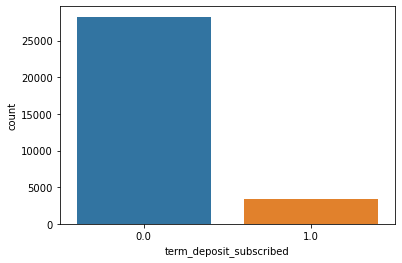

In [8]:
sns.countplot(data["term_deposit_subscribed"])

Highly Imbalanced data

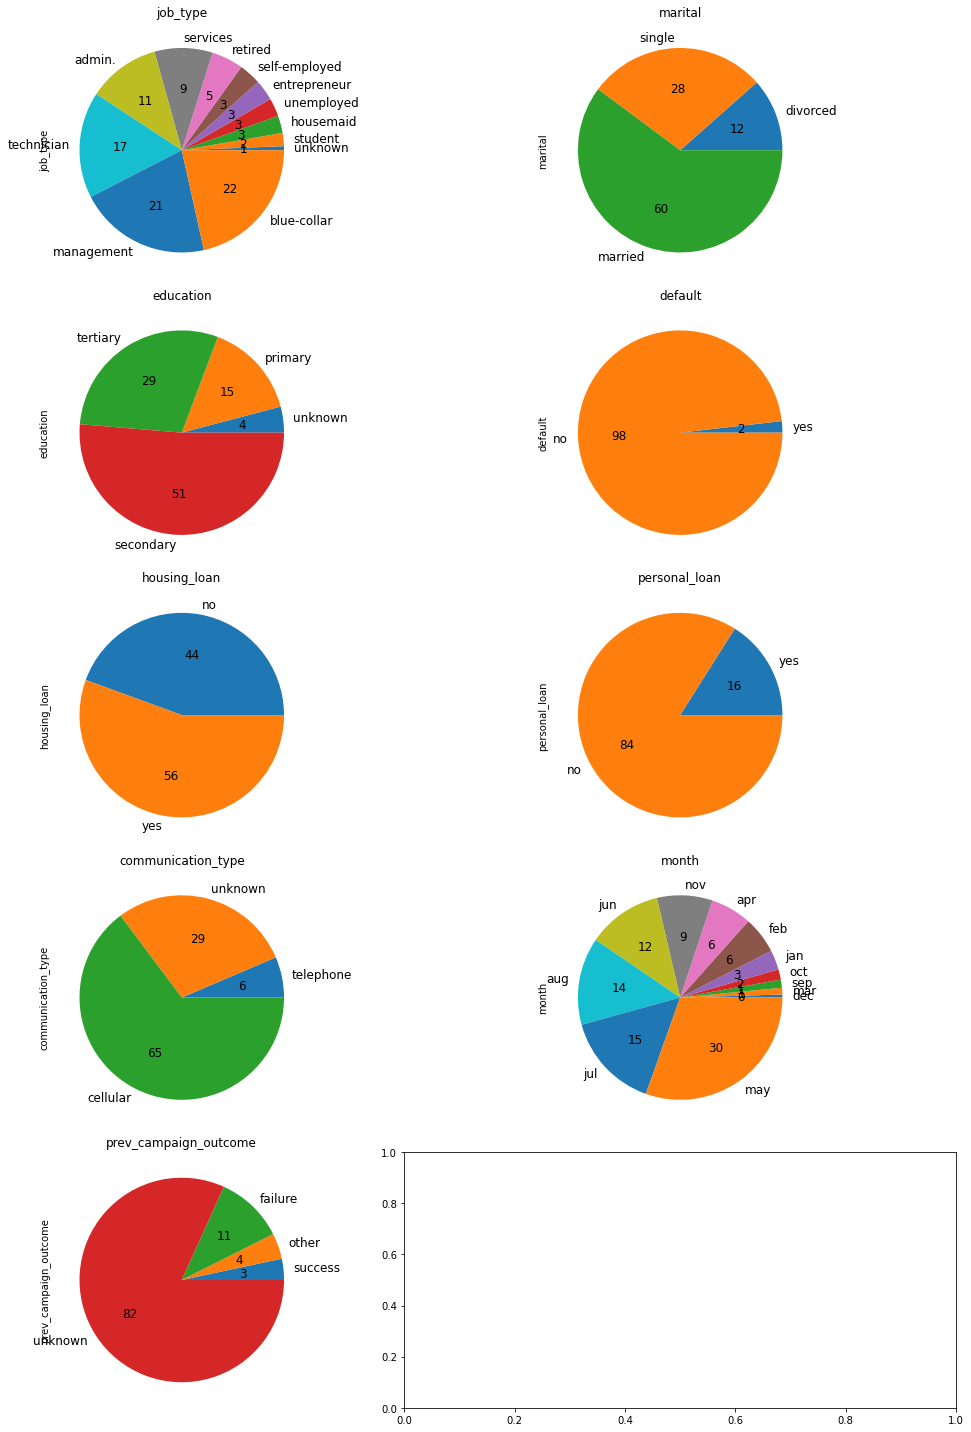

In [9]:
#pie chart for categorical columns
def pie_chart(data, list_of_cols):
    fig, axes = plt.subplots(5,2, figsize=(15,20))
    axes = [ax for axes_row in axes for ax in axes_row]
    
    for i, c in enumerate(data[list_of_cols]):
        data[c].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=c, 
                                              autopct="%.0f", fontsize=12)
        axes[i].set_label('')
        plt.tight_layout()
pie_chart(data, cat_cols)

# Univariate Analysis

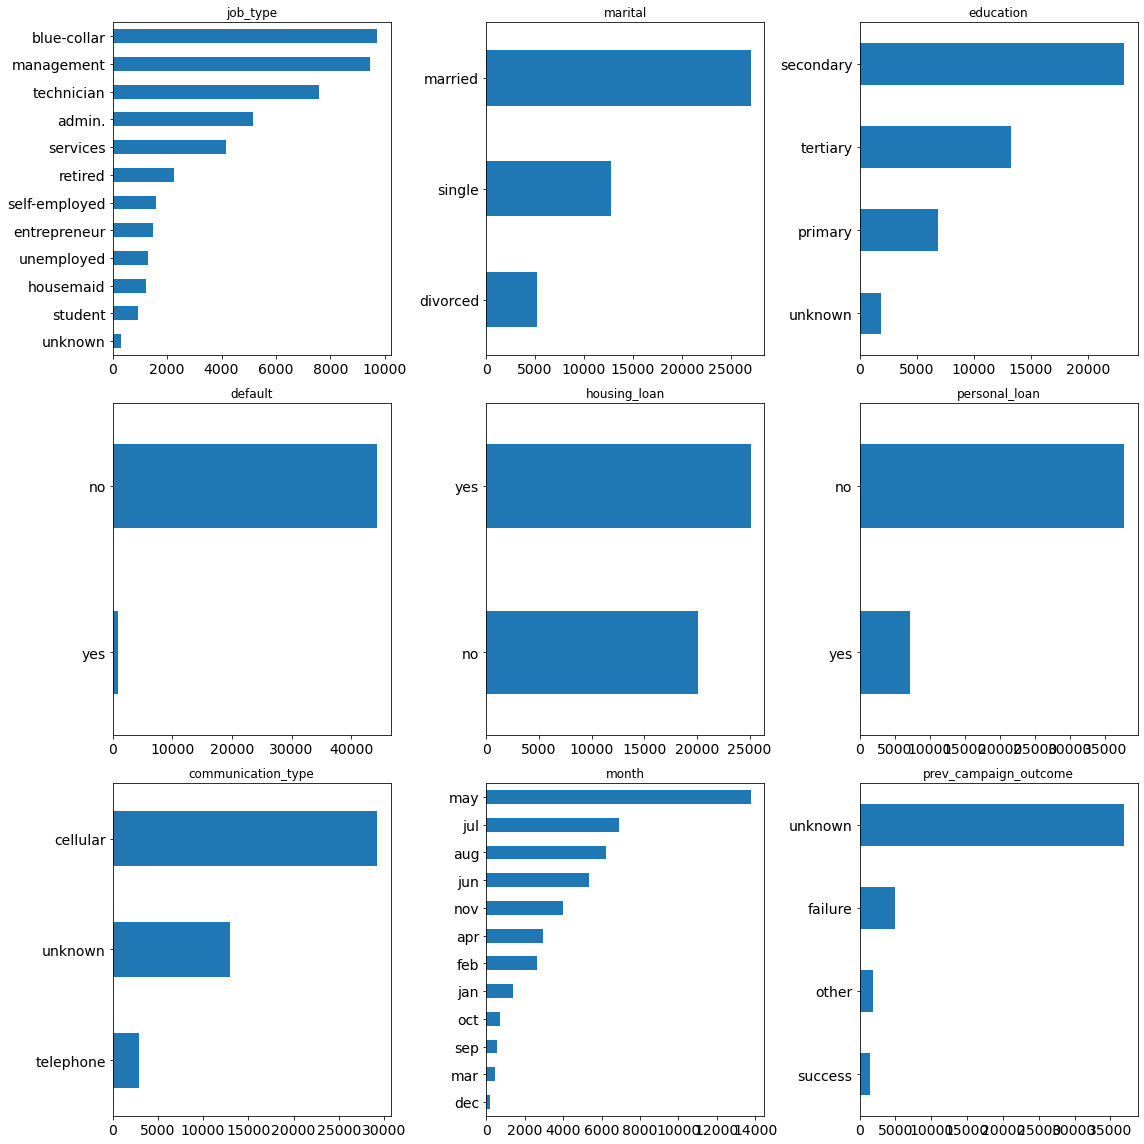

In [10]:
def univariate_count(data, list_of_cols):
    fig, axes = plt.subplots(3, 3, figsize=(16, 16))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(train[list_of_cols]):
        _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
    _ = plt.tight_layout()

univariate_count(data, cat_cols)

Distribution of  customer_age
Skewness : 0.6633554104707464, Kurtosis : 0.3079426491375705


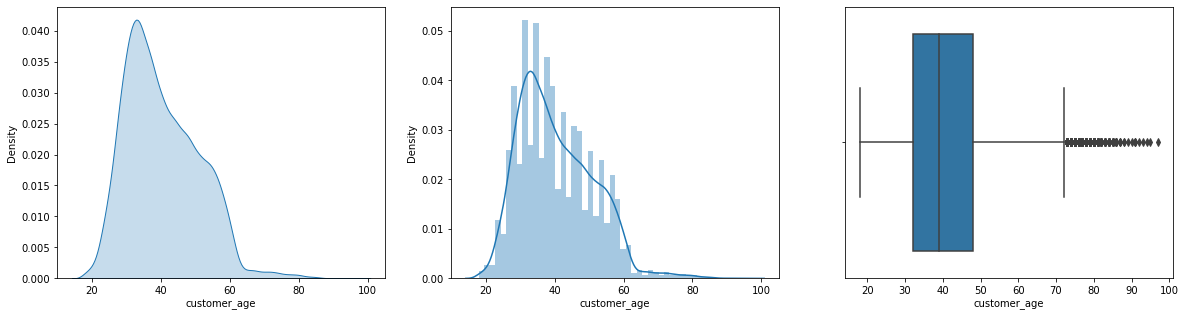

Distribution of  balance
Skewness : 8.087327690035934, Kurtosis : 133.28741119661424


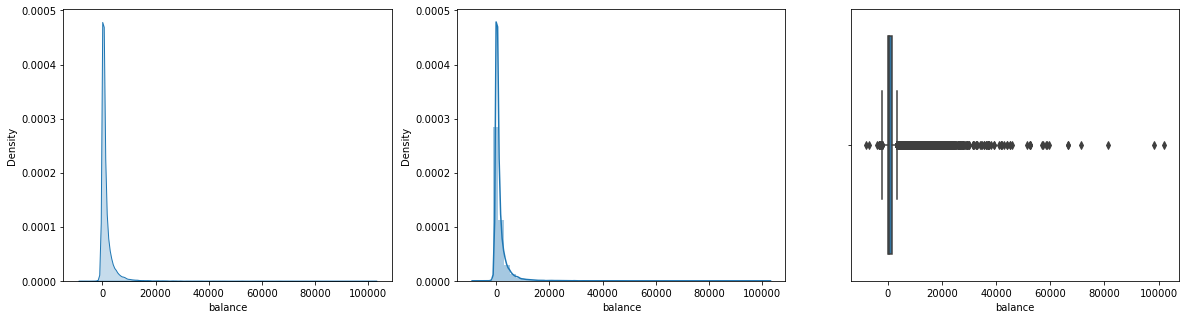

Distribution of  day_of_month
Skewness : 0.09307901402122407, Kurtosis : -1.0598973728286012


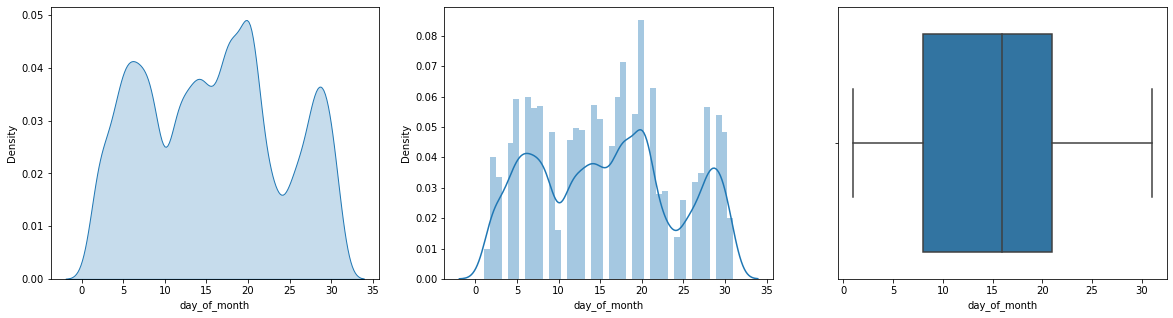

Distribution of  last_contact_duration
Skewness : 3.1336760544585096, Kurtosis : 18.081720644407078


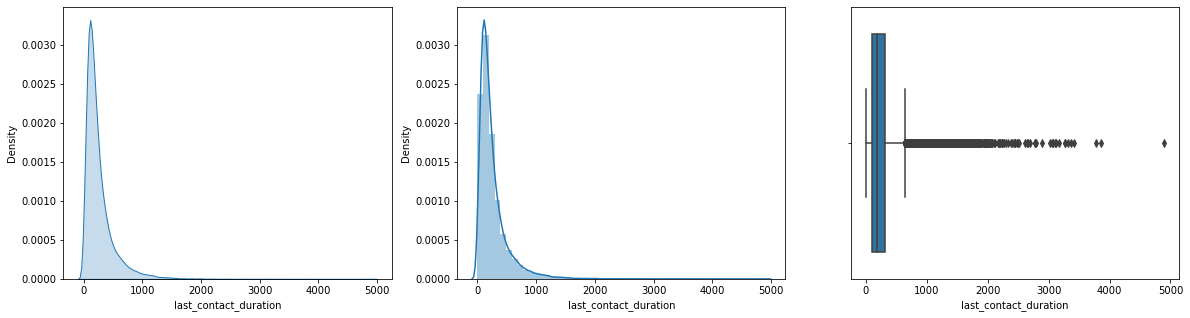

Distribution of  num_contacts_in_campaign
Skewness : 4.862436855548525, Kurtosis : 38.53556814919442


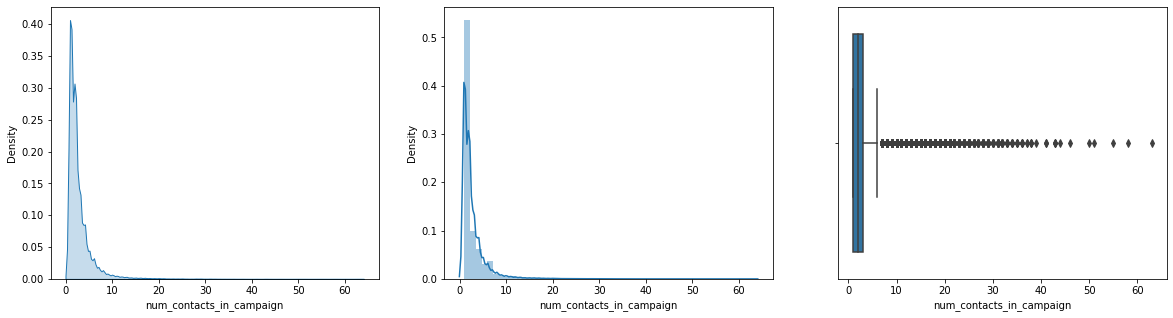

Distribution of  days_since_prev_campaign_contact
Skewness : 0.6931397093928039, Kurtosis : 1.5286825203029069


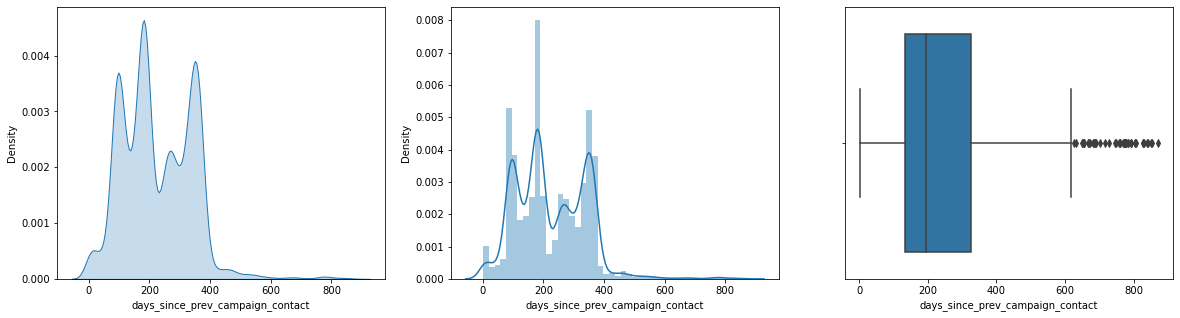

Distribution of  num_contacts_prev_campaign
Skewness : 41.84645447266289, Kurtosis : 4506.86066018326


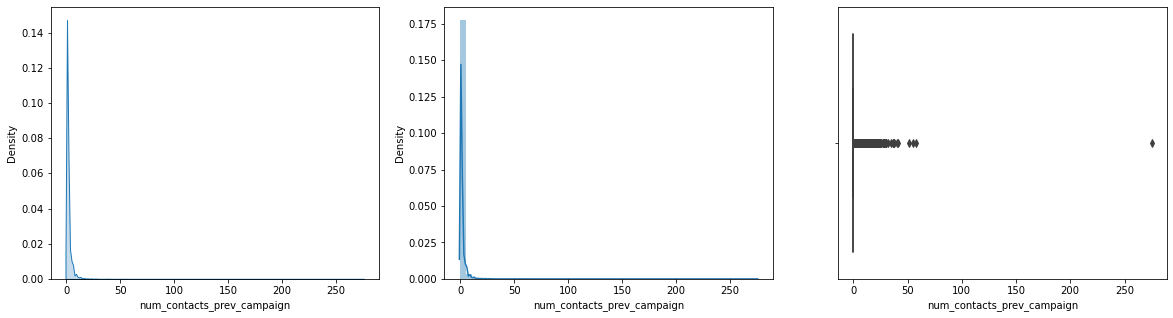

In [11]:
import warnings
warnings.filterwarnings('ignore')
def data_distribution(data, feature):
    
    plt.figure(figsize = (20,5))
    print("Distribution of ", feature)
    plt.subplot(1,3,1)
    sns.kdeplot(data[feature], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[feature])

    plt.subplot(1,3,3)
    sns.boxplot(data[feature], orient = 'vertical')

    print("Skewness : {}, Kurtosis : {}".format(data[feature].skew(), data[feature].kurtosis()))
    plt.show()
for i in num_cols:
  data_distribution(data, i)

# Bivariate Analysis

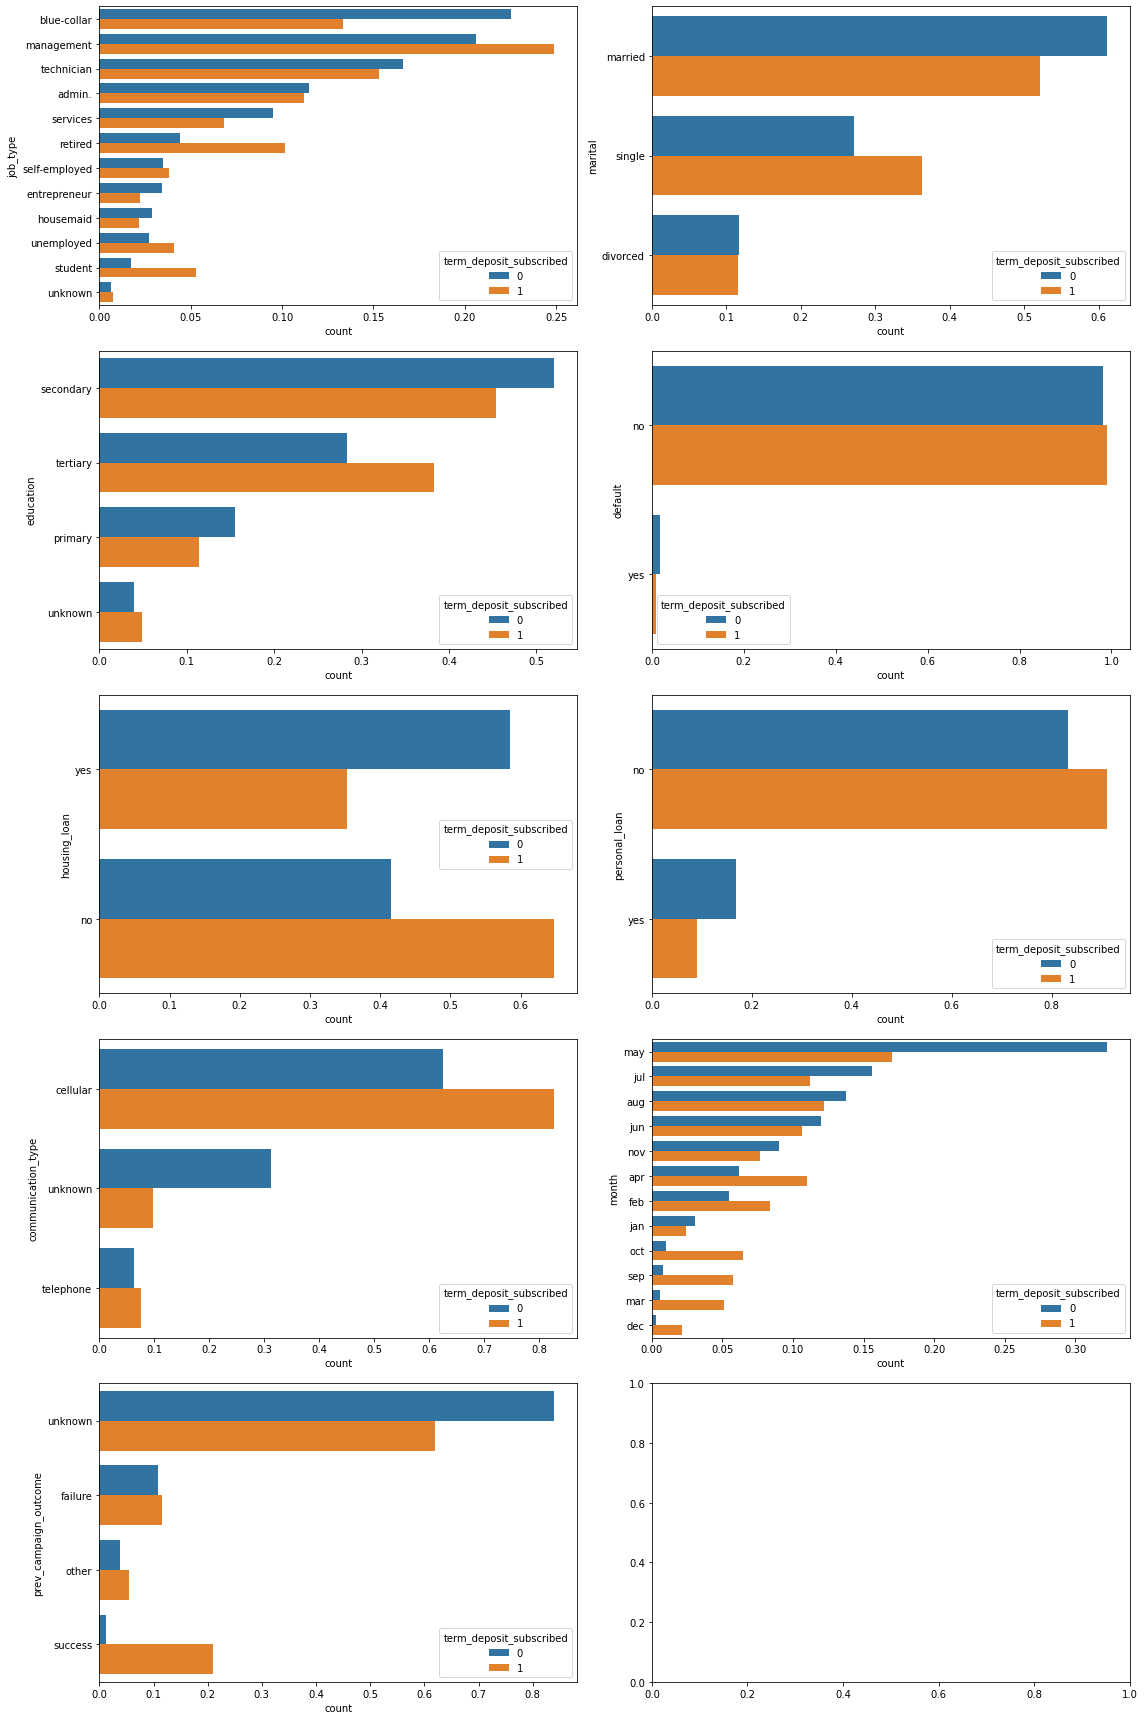

In [12]:
warnings.filterwarnings('ignore')
def bivariate_count(data, list_of_cols, target):
    fig, axes = plt.subplots(5, 2, figsize=(16, 24))
    axes = [ax for axes_row in axes for ax in axes_row]

    for i, c in enumerate(data[list_of_cols]):
        fltr = train[target] == 0
        vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

        vc_a[target] = 0
        vc_b[target] = 1

        df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

        _ = sns.barplot(y = c, x = 'count', data =df , hue=target, ax=axes[i])
    
    _ = plt.tight_layout()
bivariate_count(data, cat_cols, col_y)

<AxesSubplot:ylabel='term_deposit_subscribed'>

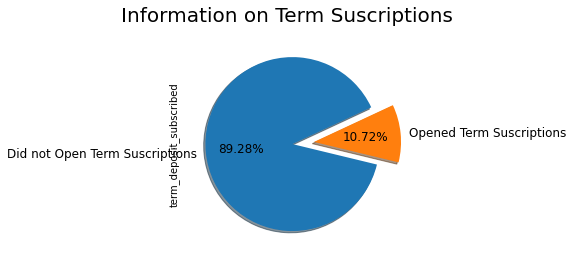

In [13]:
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"
plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["term_deposit_subscribed"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True,labels=labels,
                                              fontsize=12, startangle=25)

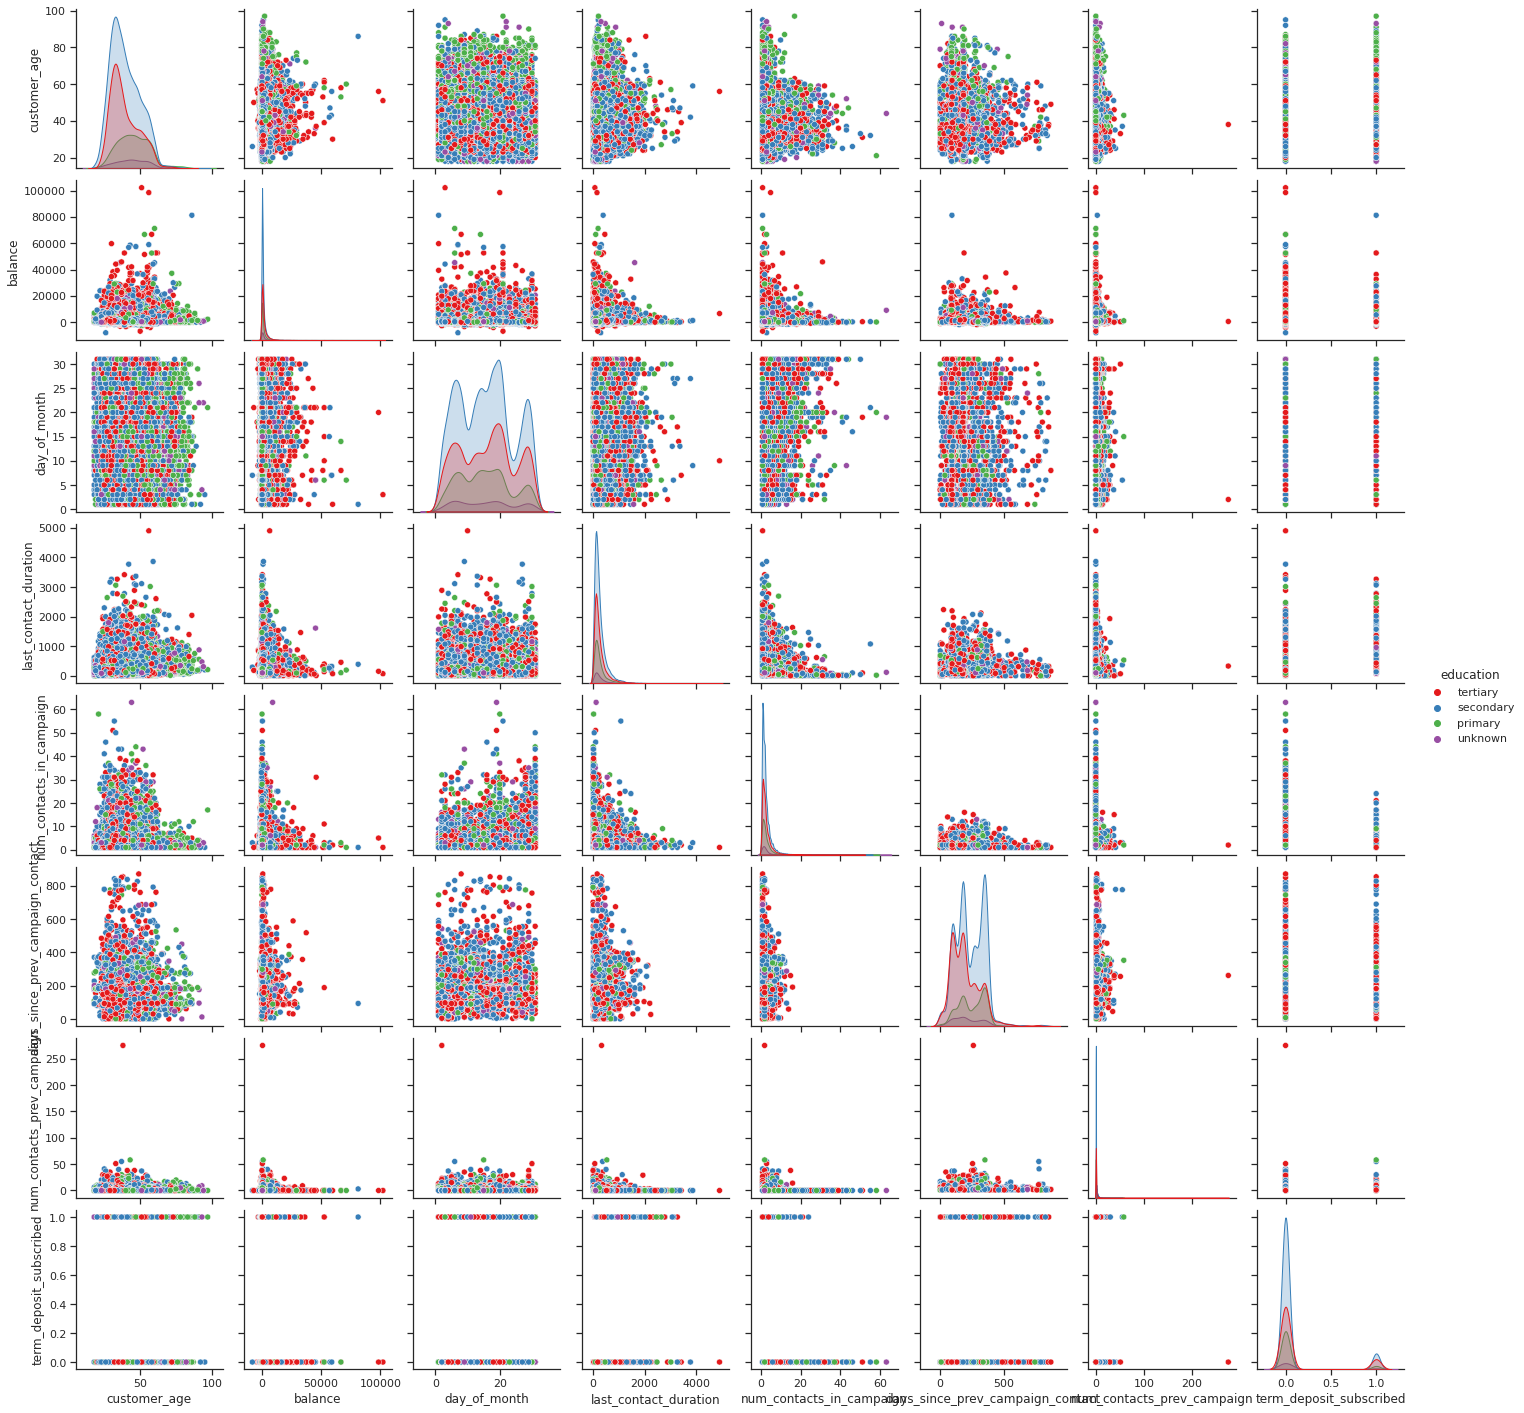

In [14]:
sns.set(style="ticks")

sns.pairplot(data, hue="education", palette="Set1")
plt.show()

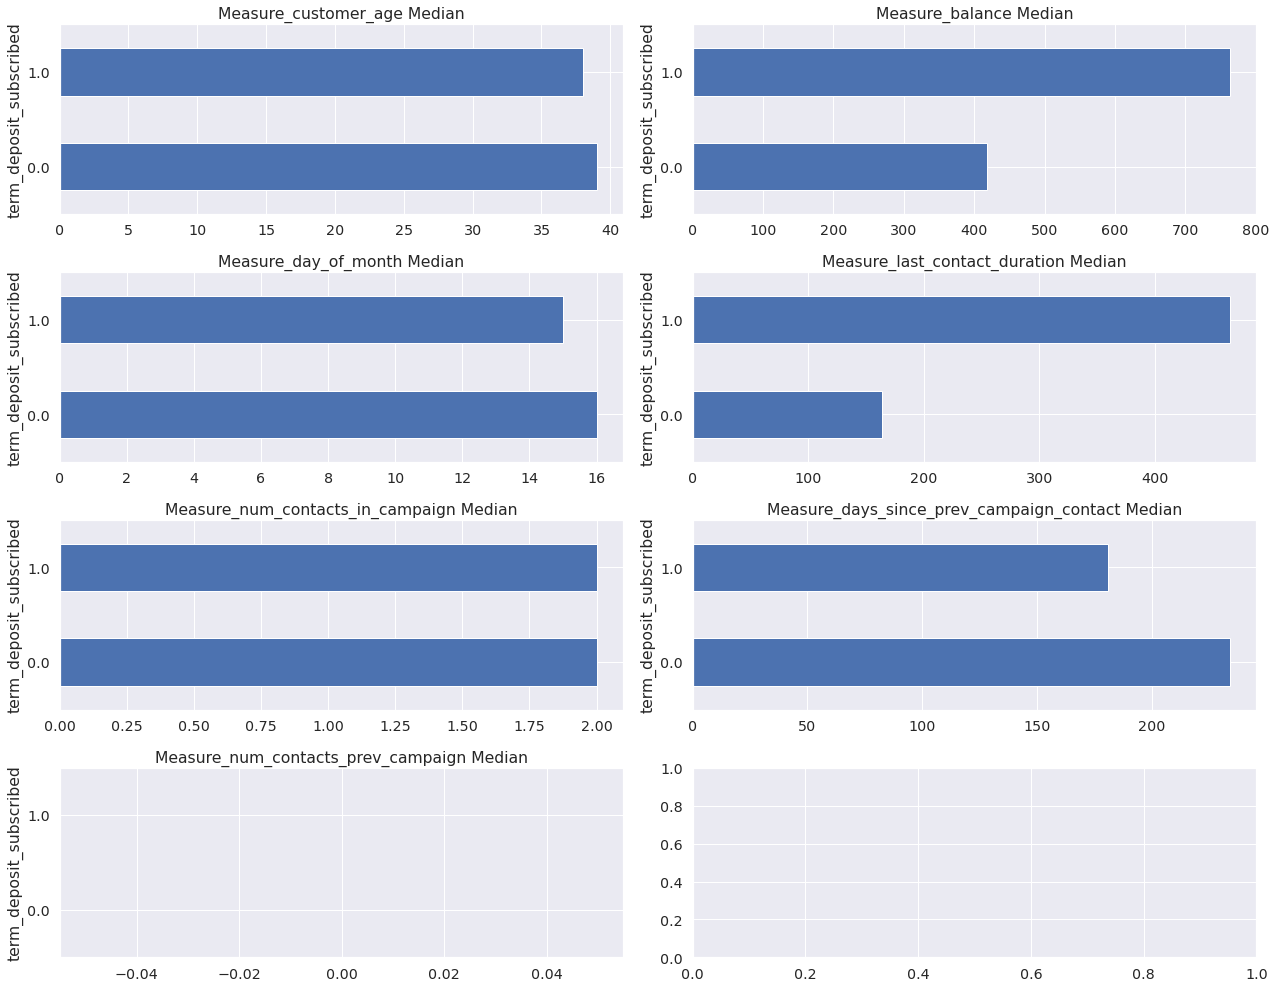

In [15]:
def median_target_comparison(data, target, list_of_cols):
    sns.set(font_scale=1.3)
    fig, axes = plt.subplots(4, 2, figsize=(18, 14))
    axes = [ax for axes_row in axes for ax in axes_row]
    for i, c in enumerate(list_of_cols):
      plot = data.groupby(target)[c].median().plot(kind = 'barh', title=f'Measure_{c} Median', ax=axes[i])
    plt.tight_layout()
median_target_comparison(data, 'term_deposit_subscribed', num_cols)

<AxesSubplot:title={'center':'Median_last_contact_duration'}, ylabel='term_deposit_subscribed'>

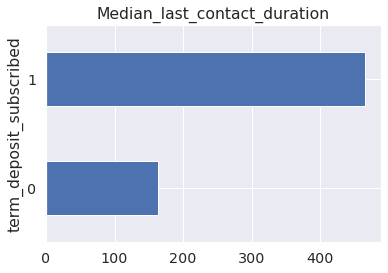

In [17]:
train.groupby(col_y)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')